In [1]:
# Import the libraries
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and preprocess datasets
item_list = pd.read_csv("C://Users//User//Downloads//item_list.csv")
shopping_trends = pd.read_csv("C://Users//User//Downloads//shopping_trends.csv")

print(item_list.head())
print(shopping_trends.head())

       Item     Category  Season
0  Backpack  Accessories     101
1  Backpack  Accessories     102
2  Backpack  Accessories     103
3  Backpack  Accessories     104
4      Belt  Accessories     101
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island 

In [3]:
# Remove duplicate entries
shopping_trends = shopping_trends.drop_duplicates()

# Display the modified DataFrame
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Remove irrelevant columns
shopping_trends = shopping_trends[['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 
                                   'Purchase Amount (USD)', 'Location', 'Season',
                                   'Review Rating', 'Subscription Status', 'Frequency of Purchases']]

# Display the modified DataFrame
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,Annually


In [5]:
# Convert season to numeric values
season_mapping = {
    'Fall': 101,
    'Spring': 102,
    'Summer': 103,
    'Winter': 104
}
shopping_trends['Season'] = shopping_trends['Season'].map(season_mapping)

# Convert frequency to numeric values
frequency_mapping = {
    'Annually': 1,
    'Bi-Weekly': 2,
    'Every 3 Months': 3,
    'Fortnightly': 4,
    'Monthly': 5,
    'Quarterly': 6,
    'Weekly': 7
}
shopping_trends['Frequency of Purchases'] = shopping_trends['Frequency of Purchases'].map(frequency_mapping)


print(item_list.head())
print(shopping_trends.head())

       Item     Category  Season
0  Backpack  Accessories     101
1  Backpack  Accessories     102
2  Backpack  Accessories     103
3  Backpack  Accessories     104
4      Belt  Accessories     101
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location  Season  Review Rating Subscription Status  \
0       Kentucky     104            3.1                 Yes   
1          Maine     104            3.1                 Yes   
2  Massachusetts     102            3.1                 Yes   
3   Rhode Island     102            3.5                 Yes   
4         Oregon  

In [6]:
# Apply filters to select eligible customers
eligible_customers1 = shopping_trends[
    (shopping_trends['Subscription Status'] == 'Yes') &
    (shopping_trends['Review Rating'] > 3.5) &
    (shopping_trends['Frequency of Purchases'] == 4) | (shopping_trends['Frequency of Purchases'] == 5) &
    (shopping_trends['Purchase Amount (USD)'] > 50)
]

eligible_customers1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Frequency of Purchases
11,12,30,Male,Shorts,Clothing,68,Hawaii,104,4.9,Yes,4
12,13,61,Male,Coat,Outerwear,72,Delaware,104,4.5,Yes,4
15,16,64,Male,Skirt,Clothing,81,Rhode Island,104,2.8,Yes,5
31,32,33,Male,Dress,Clothing,79,West Virginia,104,4.7,Yes,5
36,37,35,Male,T-shirt,Clothing,69,Illinois,104,4.6,Yes,4


In [7]:
# Apply filters to select eligible customers
eligible_customers2 = shopping_trends[
    (shopping_trends['Subscription Status'] == 'Yes') &
    (shopping_trends['Review Rating'] > 3.5) &
    ((shopping_trends['Frequency of Purchases'] == 2) | (shopping_trends['Frequency of Purchases'] == 7)) &
    (shopping_trends['Purchase Amount (USD)'] > 50)
]

eligible_customers2.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Frequency of Purchases
13,14,65,Male,Dress,Clothing,51,New Hampshire,102,4.7,Yes,7
14,15,64,Male,Coat,Outerwear,53,New York,104,4.7,Yes,7
23,24,31,Male,Pants,Clothing,88,Oklahoma,104,4.4,Yes,7
44,45,39,Male,Hat,Accessories,53,Kentucky,103,4.6,Yes,7
47,48,55,Male,Jewelry,Accessories,54,Montana,104,4.5,Yes,7


In [8]:
# Get current month
current_month = datetime.now().month

print(current_month)

# Determine season based on current month
if 3 <= current_month <= 5:
    current_season = 'Spring'
elif 6 <= current_month <= 8:
    current_season = 'Summer'
elif 9 <= current_month <= 11:
    current_season = 'Fall'
else:
    current_season = 'Winter'

print(current_season)

11
Fall


In [9]:
# Generate personalized email content for eligible_customers1
for index, row in eligible_customers1.iterrows():
    category = row['Category']
    season = current_season  # Use the determined season based on current date
    customer_name = f"Customer {index}"
    item_choices = item_list[item_list['Category'] == category]['Item'].tolist()

    # Randomly select an item from the same category
    recommended_item = random.choice(item_choices)

    # Generate email content
    email_content = f"Dear {customer_name},\n\n"
    email_content += f"We hope this message finds you well!\n\n"
    email_content += f"We are excited to share a special offer tailored just for you.\n\n"
    email_content += f"Explore our latest {category} collection for the {current_season} season and discover the perfect {recommended_item}!\n\n"
    email_content += f"Use code UNIQUE{index} at checkout to enjoy an exclusive 5% discount on your purchase.\n\n"
    email_content += f"Hurry, this offer is valid for a limited time!\n\n"
    email_content += f"Best regards,\nYour Marketing Team"

    # Print or save the email content
    print(f"Subject: Special Offer for {category} Collection\n")
    print(email_content)
    print("="*50)

Subject: Special Offer for Clothing Collection

Dear Customer 11,

We hope this message finds you well!

We are excited to share a special offer tailored just for you.

Explore our latest Clothing collection for the Fall season and discover the perfect Blouse!

Use code UNIQUE11 at checkout to enjoy an exclusive 5% discount on your purchase.

Hurry, this offer is valid for a limited time!

Best regards,
Your Marketing Team
Subject: Special Offer for Outerwear Collection

Dear Customer 12,

We hope this message finds you well!

We are excited to share a special offer tailored just for you.

Explore our latest Outerwear collection for the Fall season and discover the perfect Coat!

Use code UNIQUE12 at checkout to enjoy an exclusive 5% discount on your purchase.

Hurry, this offer is valid for a limited time!

Best regards,
Your Marketing Team
Subject: Special Offer for Clothing Collection

Dear Customer 15,

We hope this message finds you well!

We are excited to share a special offer t

In [10]:
# Initialize a list to store the email content data
email_content_data = []

# Generate personalized email content
for index, row in eligible_customers1.iterrows():
    category = row['Category']
    season = current_season  # Use the determined season based on current date
    customer_name = f"Customer {index}"
    item_choices = item_list[item_list['Category'] == category]['Item'].tolist()

    # Randomly select an item from the same category
    recommended_item = random.choice(item_choices)

    # Generate email content
    email_content = f"Dear {customer_name},\n\n"
    email_content += f"We hope this message finds you well!\n\n"
    email_content += f"We are excited to share a special offer tailored just for you.\n\n"
    email_content += f"Explore our latest {category} collection for the {current_season} season and discover the perfect {recommended_item}!\n\n"
    email_content += f"Use code UNIQUE{index} at checkout to enjoy an exclusive 5% discount on your purchase.\n\n"
    email_content += f"Hurry, this offer is valid for a limited time!\n\n"
    email_content += f"Best regards,\nYour Marketing Team"

    # Add data to email_content_data list
    email_content_data.append({
        'Customer ID': index,
        'Subject': f"Special Offer for {category} Collection",
        'Salutation': f"Dear {customer_name},",
        'Body': email_content,
        'Closing': "Best regards,\nYour Marketing Team",
        'Product': recommended_item,
        'Category': category
    })

# Create a DataFrame from email_content_data
email_content_df = pd.DataFrame(email_content_data)

# Save to a CSV file
email_content_df.to_csv("C://Users//User//Downloads//email_content1.csv", index=False)

In [11]:
# Generate personalized email content for eligible_customers2
for index, row in eligible_customers2.iterrows():
    category = row['Category']
    season = current_season  # Use the determined season based on current date
    customer_name = f"Customer {index}"
    item_choices = item_list[item_list['Category'] == category]['Item'].tolist()

    # Randomly select an item from the same category
    recommended_item = random.choice(item_choices)

    # Generate email content
    email_content = f"Dear {customer_name},\n\n"
    email_content += f"We hope this message finds you well!\n\n"
    email_content += f"We are excited to share a special offer exclusively for you.\n\n"
    email_content += f"Discover our latest {category} collection for the {current_season} season and indulge in our exquisite {recommended_item}!\n\n"
    email_content += f"Use code SPECIAL{index} at checkout to enjoy a generous 15% discount on your purchase.\n\n"
    email_content += f"Seize this opportunity, as this offer is available for a limited time!\n\n"
    email_content += f"Best regards,\nYour Marketing Team"

    # Print or save the email content
    print(f"Subject: Exclusive Offer for {category} Collection\n")
    print(email_content)
    print("="*50)

Subject: Exclusive Offer for Clothing Collection

Dear Customer 13,

We hope this message finds you well!

We are excited to share a special offer exclusively for you.

Discover our latest Clothing collection for the Fall season and indulge in our exquisite Skirt!

Use code SPECIAL13 at checkout to enjoy a generous 15% discount on your purchase.

Seize this opportunity, as this offer is available for a limited time!

Best regards,
Your Marketing Team
Subject: Exclusive Offer for Outerwear Collection

Dear Customer 14,

We hope this message finds you well!

We are excited to share a special offer exclusively for you.

Discover our latest Outerwear collection for the Fall season and indulge in our exquisite Coat!

Use code SPECIAL14 at checkout to enjoy a generous 15% discount on your purchase.

Seize this opportunity, as this offer is available for a limited time!

Best regards,
Your Marketing Team
Subject: Exclusive Offer for Clothing Collection

Dear Customer 23,

We hope this message

In [12]:
# Initialize a list to store the email content data
email_content_data = []

# Generate personalized email content
for index, row in eligible_customers2.iterrows():
    category = row['Category']
    season = current_season  # Use the determined season based on current date
    customer_name = f"Customer {index}"
    item_choices = item_list[item_list['Category'] == category]['Item'].tolist()

    # Randomly select an item from the same category
    recommended_item = random.choice(item_choices)

    # Generate email content
    email_content = f"Dear {customer_name},\n\n"
    email_content += f"We hope this message finds you well!\n\n"
    email_content += f"We are excited to share a special offer exclusively for you.\n\n"
    email_content += f"Discover our latest {category} collection for the {current_season} season and indulge in our exquisite {recommended_item}!\n\n"
    email_content += f"Use code SPECIAL{index} at checkout to enjoy a generous 15% discount on your purchase.\n\n"
    email_content += f"Seize this opportunity, as this offer is available for a limited time!\n\n"
    email_content += f"Best regards,\nYour Marketing Team"

    # Add data to email_content_data list
    email_content_data.append({
        'Customer ID': index,
        'Subject': f"Exclusive Offer for {category} Collection",
        'Salutation': f"Dear {customer_name},",
        'Body': email_content,
        'Closing': "Best regards,\nYour Marketing Team",
        'Product': recommended_item,
        'Category': category
    })

# Create a DataFrame from email_content_data
email_content_df = pd.DataFrame(email_content_data)

# Save to a CSV file
email_content_df.to_csv("C://Users//User//Downloads//email_content2.csv", index=False)

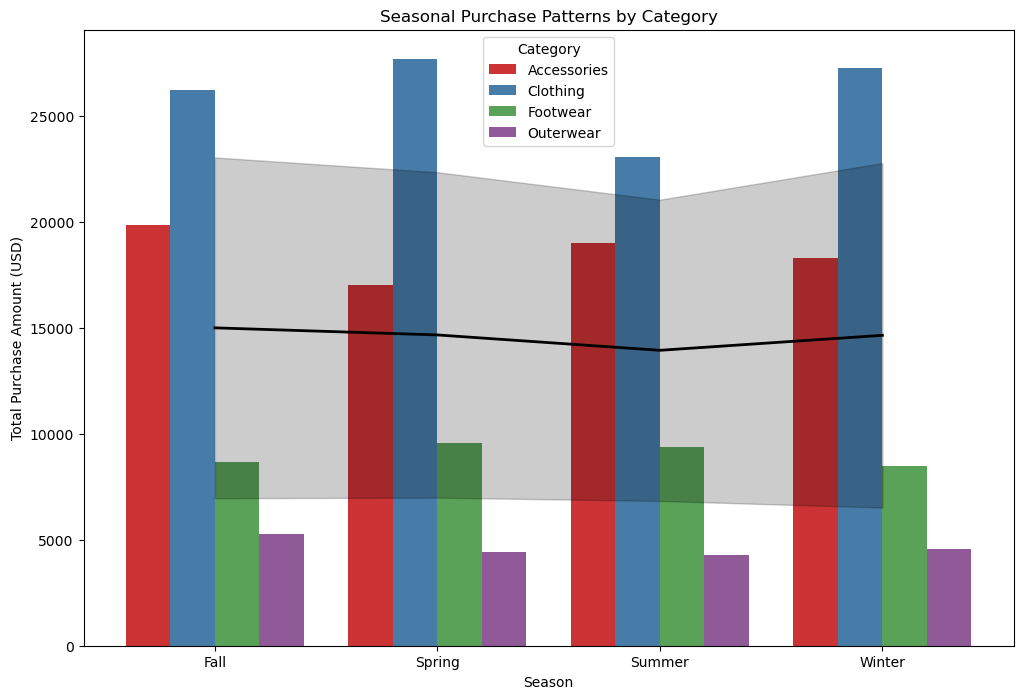

In [13]:
# Create a mapping for seasons
season_mapping = {
    101: 'Fall',
    102: 'Spring',
    103: 'Summer',
    104: 'Winter'
}

# Map the numeric season values to their actual names
shopping_trends['Season'] = shopping_trends['Season'].map(season_mapping)

# Group by Season and Category to get total purchase amounts
grouped_data = shopping_trends.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a grouped bar and line chart
plt.figure(figsize=(12, 8))

sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Category', data=grouped_data, palette='Set1')
sns.lineplot(x='Season', y='Purchase Amount (USD)', data=grouped_data, color='black', linewidth=2)

plt.title('Seasonal Purchase Patterns by Category')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')

plt.legend(title='Category')
plt.show()

In [14]:
shopping_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,4
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,4
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,7
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,1


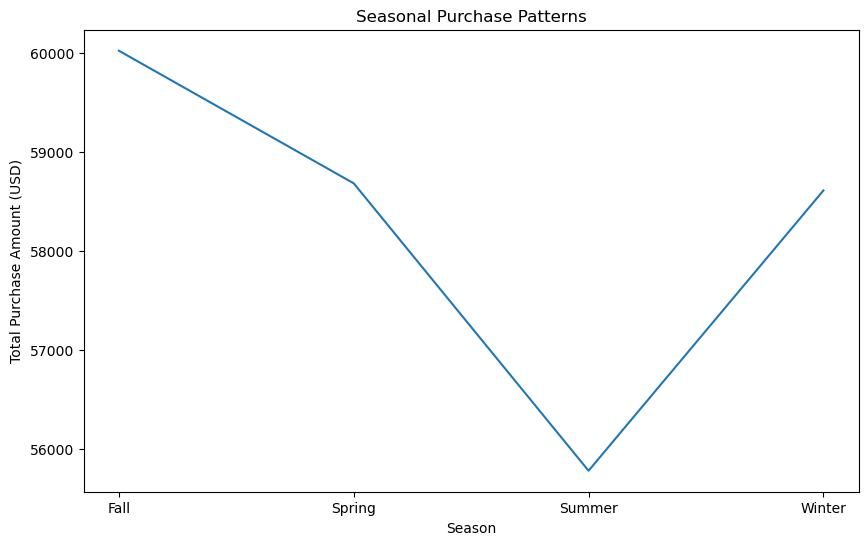

In [15]:
# Seasonal Purchase Patterns (Line Chart)
seasonal_purchase = shopping_trends.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='Purchase Amount (USD)', data=seasonal_purchase)
plt.title('Seasonal Purchase Patterns')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

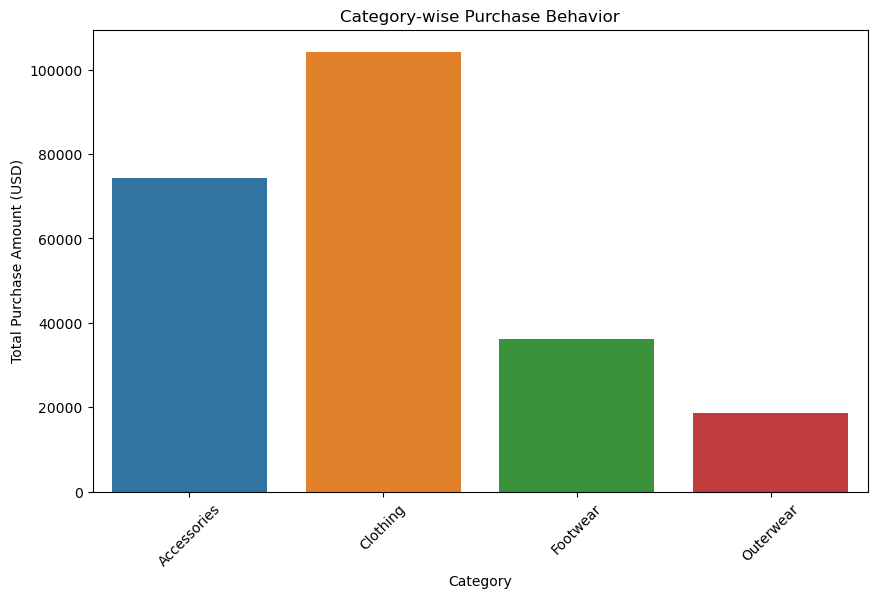

In [16]:
# Category-wise Purchase Behavior (Bar Chart)
category_purchase = shopping_trends.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_purchase)
plt.title('Category-wise Purchase Behavior')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

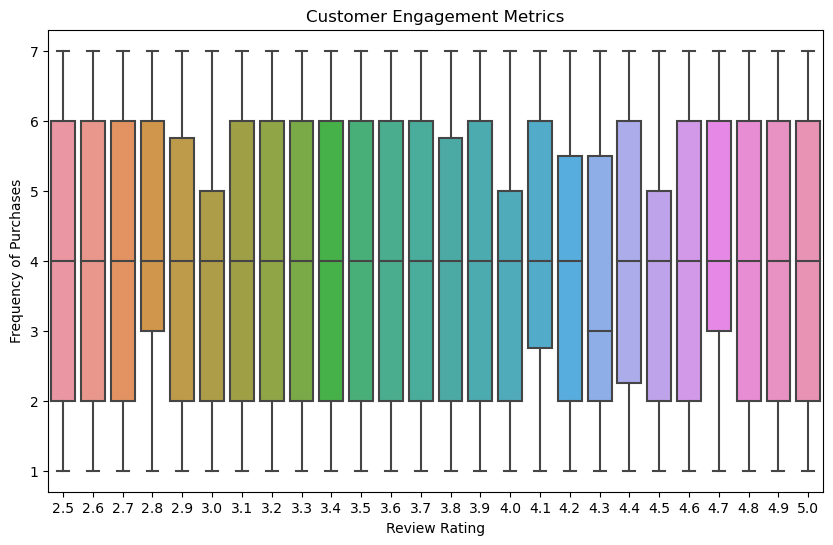

In [17]:
# Customer Engagement Metrics (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Review Rating', y='Frequency of Purchases', data=shopping_trends)
plt.title('Customer Engagement Metrics')
plt.xlabel('Review Rating')
plt.ylabel('Frequency of Purchases')
plt.show()